<a href="https://colab.research.google.com/github/saotomryo/Use_MMGeneration/blob/main/Use_MMGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import json
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import cv2
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device = ", device)

## 環境準備 MMCV MMGenerationのインストール

In [ ]:
# MMCVのインストール
!pip install -U openmim
!mim install mmcv-full

In [ ]:
HOME_PATH = "/content"

In [ ]:

!git clone https://github.com/open-mmlab/mmgeneration.git
%cd /content/mmgeneration
#!pip install -r requirements/build.txt
#!pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools"
!pip install -v -e .  # or "python setup.py develop"

## デモスクリプトによりStylegan2によりランダムに人の画像を生成します。（実行毎に出力結果が変わります。）

In [ ]:
import mmcv
from mmgen.apis import init_model, sample_unconditional_model

# Specify the path to model config and checkpoint file
config_file = 'configs/styleganv2/stylegan2_c2_ffhq_1024_b4x8.py'
# you can download this checkpoint in advance and use a local file path.
checkpoint_file = 'https://download.openmmlab.com/mmgen/stylegan2/stylegan2_c2_ffhq_1024_b4x8_20210407_150045-618c9024.pth'

# init a generatvie
model = init_model(config_file, checkpoint_file, device=device)
# sample images
fake_imgs = sample_unconditional_model(model, 4)

load checkpoint from http path: https://download.openmmlab.com/mmgen/stylegan2/stylegan2_c2_ffhq_1024_b4x8_20210407_150045-618c9024.pth


2022-07-22 00:56:03,980 - mmgen - INFO - Switch to evaluation style mode: single
2022-07-22 00:56:03,989 - mmgen - INFO - Switch to evaluation style mode: single


## 生成された画像を表示します。

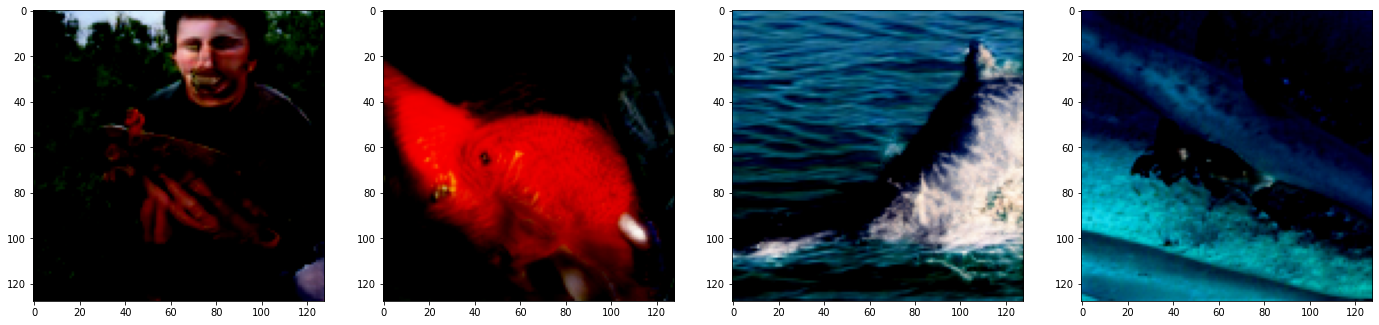

In [ ]:
images = []

plt.figure(figsize=(24,16))
m = fake_imgs.cpu().numpy().shape[0]

for i,image in enumerate(fake_imgs.cpu().numpy()):
    image = image.transpose(1,2,0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    plt.subplot(1,m,i+1)
    plt.imshow(image)
plt.show()


## デモスクリプトによりBigGanによりラベルからの画像を生成します。（実行毎に出力結果が変わります。）

In [ ]:
import mmcv
from mmgen.apis import init_model, sample_conditional_model

# Specify the path to model config and checkpoint file
config_file = 'configs/sagan/sagan_128_woReLUinplace_noaug_bigGAN_Glr-1e-4_Dlr-4e-4_ndisc1_imagenet1k_b32x8.py'
# you can download this checkpoint in advance and use a local file path.
checkpoint_file = 'https://download.openmmlab.com/mmgen/sagan/sagan_128_woReLUinplace_noaug_bigGAN_imagenet1k_b32x8_Glr1e-4_Dlr-4e-4_ndisc1_20210818_210232-3f5686af.pth'

# init a generatvie
model = init_model(config_file, checkpoint_file, device=device)
# sample images with random label
fake_imgs1 = sample_conditional_model(model, 4)

# sample images with the same label
fake_imgs2 = sample_conditional_model(model, 4, label=0)

# sample images with specific labels
fake_imgs3 = sample_conditional_model(model, 4, label=[0, 1, 2, 3])

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/conv_module.py:154: UserWarning: Unnecessary conv bias before batch/instance norm
  'Unnecessary conv bias before batch/instance norm')


load checkpoint from http path: https://download.openmmlab.com/mmgen/sagan/sagan_128_woReLUinplace_noaug_bigGAN_imagenet1k_b32x8_Glr1e-4_Dlr-4e-4_ndisc1_20210818_210232-3f5686af.pth


### ランダムラベルからの生成した画像を表示

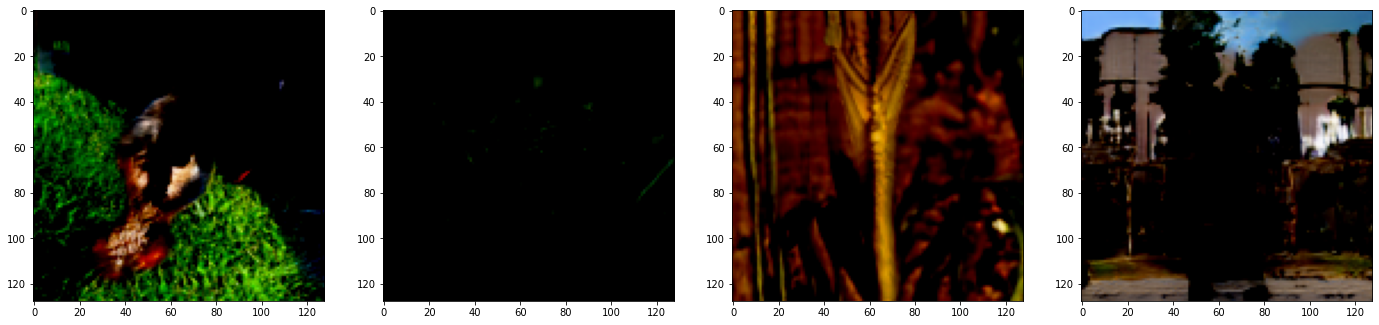

In [ ]:
images = []

plt.figure(figsize=(24,16))
m = fake_imgs1.cpu().numpy().shape[0]

for i,image in enumerate(fake_imgs1.cpu().numpy()):
    image = image.transpose(1,2,0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    plt.subplot(1,m,i+1)
    plt.imshow(image)
plt.show()

## 同じラベル（labe0、コイ)から生成した画像を表示

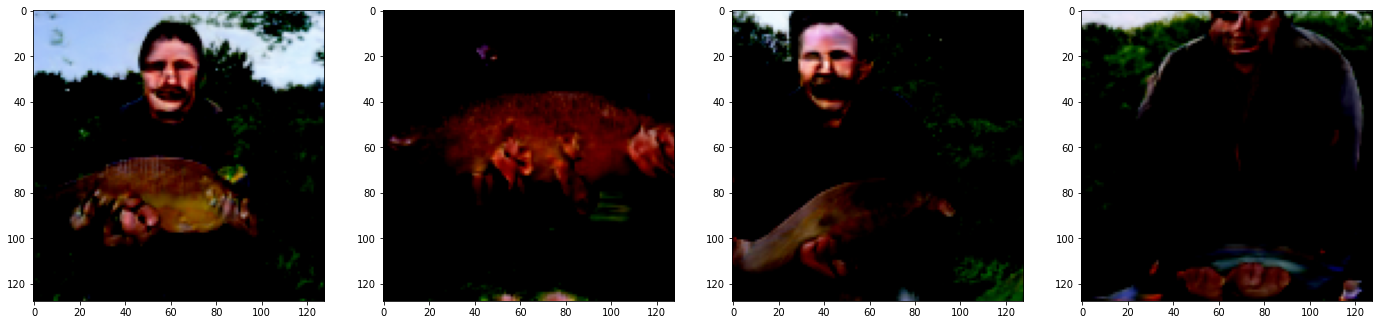

In [ ]:
images = []

plt.figure(figsize=(24,16))
m = fake_imgs2.cpu().numpy().shape[0]

for i,image in enumerate(fake_imgs2.cpu().numpy()):
    image = image.transpose(1,2,0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    plt.subplot(1,m,i+1)
    plt.imshow(image)
plt.show()

# ラベル毎の生成した画像を表示
- ラベル0: "tench, Tinca tinca"(コイ目コイ科に属する魚類の一種)  
- ラベル1: "goldfish, Carassius auratus"(金魚）  
-ラベル2: "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias"(ホホジロザメ)  
- ラベル3: "tiger shark, Galeocerdo cuvieri"（イタチザメ）  

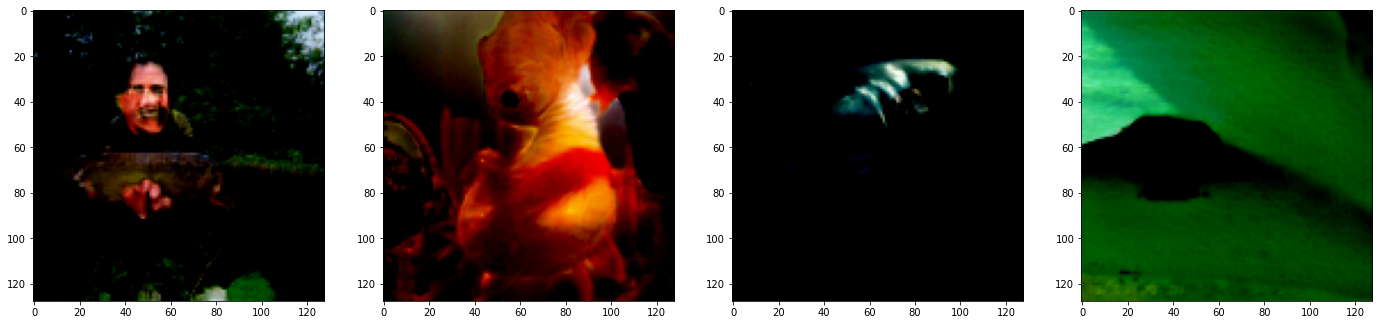

In [ ]:
images = []

plt.figure(figsize=(24,16))
m = fake_imgs3.cpu().numpy().shape[0]

for i,image in enumerate(fake_imgs3.cpu().numpy()):
    image = image.transpose(1,2,0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    plt.subplot(1,m,i+1)
    plt.imshow(image)
plt.show()

## Image Translation

In [ ]:
import mmcv

from mmgen.apis import init_model, sample_img2img_model

# Specify the path to model config and checkpoint file
config_file = 'configs/pix2pix/pix2pix_vanilla_unet_bn_wo_jitter_flip_edges2shoes_b1x4_190k.py'
# you can download this checkpoint in advance and use a local file path.
checkpoint_file = 'https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth'
# Specify the path to image you want to translate
image_path = 'tests/data/paired/test/33_AB.jpg'

# init a generatvie
model = init_model(config_file, checkpoint_file, device=device)
# translate a single image
translated_image = sample_img2img_model(model, image_path, target_domain='photo')

load checkpoint from http path: https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth


Downloading: "https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth" to /root/.cache/torch/hub/checkpoints/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth


  0%|          | 0.00/218M [00:00<?, ?B/s]

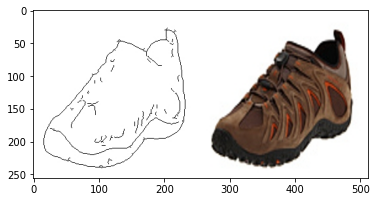

In [ ]:
# サンプル画像の表示
sample_image = cv2.imread(image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image)

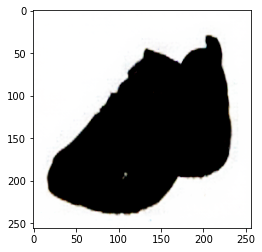

In [ ]:

translate_image = translated_image.cpu().numpy()[0].transpose(1,2,0)
translate_image = cv2.cvtColor(translate_image, cv2.COLOR_BGR2RGB)
plt.imshow(translate_image)